**Toronto Airbnb Dataset**

Questions?

**1) What are the most desired anementies that customers prefer when booking an Airbnbs?**

2) Does the number of bedrooms increase the pricing of the  

3) Which type of room is most preferred ? - entire house, private, etc

4) Price - correlation with number of bedrooms, or bathrooms, etc   

5) Number of bathrooms - number

6) Property type - apartment, house,etc - increase cost?

7) Reviews -  score rating - correlation with number of beds, increased satisfaction with the popular anementies - ?

Does having the best anementies increase rating?

Bedrooms and bathrooms - price increase?

**3 MAIN ! Can we predict the price of the based on the features that are provided?**

How well can we predict the cost of an Airbnb based on the features provided?

Does the neighborhood of the Airbnb location have an influence on the cost price?
example asnwer, 
we can see from the data ,yes, in fact, x percent of people in downtown costs more than the ones in x

ratings = 


1. Installing and Importing Python Libraries

In [34]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
from collections import defaultdict
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import math

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


In [57]:
df_list = pd.read_csv('listings_sep_09_2020.csv')

In [53]:
df_list.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [36]:
# displays the data types and the number of these data types in the dataset
df_list.dtypes.value_counts()

object     33
int64      21
float64    20
dtype: int64

In [37]:
df_list.shape

(19343, 74)

In [38]:
# displays columns with missing values
df_list.isnull().sum().sort_values(ascending=False)

bathrooms                       19343
license                         19343
neighbourhood_group_cleansed    19343
calendar_updated                19343
host_about                       8385
                                ...  
longitude                           0
latitude                            0
calendar_last_scraped               0
neighbourhood_cleansed              0
id                                  0
Length: 74, dtype: int64

In [39]:
#Below code shows the columns names that do not have any missing values and all values are unique (different from each other) 
df_list.nunique()[df_list.nunique()==len(df_list)]

id             19343
listing_url    19343
dtype: int64

In [55]:
#The number of listings in each neighbourhood
df_list.groupby('neighbourhood_cleansed').count()['id'].sort_values(ascending = False)

neighbourhood_cleansed
Waterfront Communities-The Island    3291
Niagara                               836
Annex                                 630
Church-Yonge Corridor                 628
Bay Street Corridor                   584
                                     ... 
Elms-Old Rexdale                       12
Beechborough-Greenbrook                11
Thistletown-Beaumond Heights           11
Markland Wood                          10
Rustic                                  9
Name: id, Length: 140, dtype: int64

In [61]:
reviews.shape

NameError: name 'reviews' is not defined

In [40]:
cat_df = df_list.select_dtypes(include=['object'])# Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe - should be 147
cat_df.shape[1]

np.sum(np.sum(cat_df.isnull())/cat_df.shape[0] == 0)# Cell for your work here # number of columns with no missing values


13

In [41]:
df_list['amenities'].value_counts().sort_values(ascending=False) #Provide a pandas series of the counts for each Professional status

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             63
["Carbon monoxide alarm", "Shampoo", "Iron", "Dryer", "Free parking on premises", "Kitchen", "Fire extinguisher", "Hangers", "Hair dryer", "Wifi", "Air conditioning", "Heating", "Washer", "Smoke alarm", "First aid kit", "Hot water", "Essentials", "Laptop-friendly workspace"]                                                                   

In [49]:

df_org = df_list[['name', 'neighbourhood_cleansed', 'property_type', 'bedrooms', 'amenities', 'price', 'availability_30', 'number_of_reviews', 'review_scores_rating']]
df_org.head()

,name,neighbourhood_cleansed,property_type,bedrooms,amenities,price,availability_30,number_of_reviews,review_scores_rating
0,Beautiful home in amazing area!,Little Portugal,Entire house,5.0,"[""Shampoo"", ""TV"", ""Dryer"", ""Indoor fireplace"",...",$469.00,0,7,100.0
1,Downtown Harbourfront Private Room,Waterfront Communities-The Island,Private room in apartment,1.0,"[""Shampoo"", ""TV"", ""Pool"", ""Gym"", ""Free parking...",$99.00,30,169,97.0
2,Seaton Village Parlour Bedroom,Annex,Private room in house,1.0,"[""Indoor fireplace"", ""Wifi""]",$66.00,0,0,NaN
3,Queen Bedroom close to downtown,Briar Hill-Belgravia,Private room in house,1.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$70.00,0,217,95.0
4,World Class downtown @CN Tower Theatre MTCC ga...,Waterfront Communities-The Island,Entire condominium,1.0,"[""Carbon monoxide alarm"", ""Private entrance"", ...",$135.00,23,40,95.0


In [50]:
#Only use quant variables and drop any rows with missing values
num_vars = df_list[['bedrooms', 'amenities', 'availability_30', 'number_of_reviews', 'review_scores_rating']]

#Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['price'], axis=0)

# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = fill_df[['bedrooms', 'amenities', 'availability_30', 'number_of_reviews', 'review_scores_rating']]
y = fill_df['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

KeyError: ['price']

In [75]:
print(df_list.shape)

(19343, 74)


In [76]:
df_list.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.934300e+04,1.934300e+04,1.934300e+04,19339.00000,19339.00000,0.0,19343.00000,19343.000000,19343.000000,0.0,...,14974.000000,14978.000000,14971.000000,14972.000000,0.0,19343.000000,19343.000000,19343.000000,19343.000000,15278.000000
mean,2.643076e+07,2.020091e+13,1.075906e+08,5.52283,5.52283,NaN,43.68067,-79.397729,3.059453,NaN,...,9.724723,9.733876,9.720059,9.447903,NaN,4.403919,2.789381,1.335418,0.231453,1.256697
std,1.279592e+07,0.000000e+00,1.041941e+08,15.39491,15.39491,NaN,0.04799,0.064381,2.027237,NaN,...,0.782041,0.797909,0.690414,0.956832,NaN,8.791279,7.834743,3.037097,2.795431,1.628429
min,1.419000e+03,2.020091e+13,1.565000e+03,0.00000,0.00000,NaN,43.58671,-79.634720,1.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.624379e+07,2.020091e+13,2.062439e+07,1.00000,1.00000,NaN,43.64556,-79.426415,2.000000,NaN,...,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.200000
50%,2.756845e+07,2.020091e+13,6.718598e+07,1.00000,1.00000,NaN,43.66277,-79.397490,2.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.620000
75%,3.804992e+07,2.020091e+13,1.814624e+08,4.00000,4.00000,NaN,43.69989,-79.376830,4.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,1.670000
max,4.535132e+07,2.020091e+13,3.664602e+08,272.00000,272.00000,NaN,43.83516,-79.127810,16.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,67.000000,64.000000,30.000000,46.000000,16.130000


In [27]:
#I first create an empty list to fill with amenities available.
list_of_amenities = []

#I create a for loop to append all amenities values from the dataset into the list.
for i in range(len(df_list)):
    list_of_amenities.append(df_list['amenities'][i])

    
#In the dataset, every listing has a list of amenities, so in order to take unique amenities from the whole dataset
#I use the below code. I use the "set" function to make the amenities unique and than convert the set into a list
#to remain consistency of data type.
list_of_amenities = list((s.strip('\'\{\}') for s in list_of_amenities))
list_of_amenities_string = ",".join(list_of_amenities)
list_of_amenities = list(set(list_of_amenities_string.split(",")))

#After execution the above lines in this cell, we have an empty string in the list of amenties.
#We have to remove that one from the list.
without_empty_list_of_amenities = []
for string in list_of_amenities:
    if (string != ""):
        without_empty_list_of_amenities.append(string)
list_of_amenities = without_empty_list_of_amenities

In [30]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of amenities
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the amenity is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [31]:
#I create a dataframe named study, which has lists of amenities as one column and the count of these amenities lists
#in our main (df_lis)
study = df_list['amenities'].value_counts().reset_index()
study.rename(columns={'index': 'amenities', 'amenities': 'count'}, inplace=True)

In [32]:
#Here with the total_count function, I count the number of listings that contains each amenity in the amenities list.
study_df = total_count(study, 'amenities', 'count', list_of_amenities)
study_df.set_index('amenities', inplace=True)

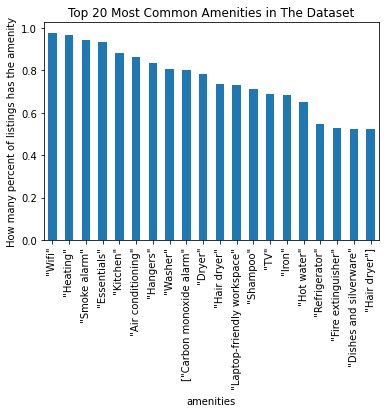

In [33]:
#Here I create a bar chart to show the percentage of each amenity from the most common to the least common.
(study_df/len(df_list))[:20].plot(kind='bar', legend=None);
plt.title('Top 20 Most Common Amenities in The Dataset');
plt.ylabel('How many percent of listings has the amenity')
plt.show()

In [ ]:
In the above chart you can see that the most common amenities in Toronto listings are:

Internet
Wireless Internet
Heating
Smoke Detector
Essentials

In [ ]:

Whereas the least common amenities in Toronto listings are:

Lock on Bedroom Door
Doorman
Smoking Allowed
Other pet(s)
Washer / Dryer

In [86]:
def clean_data(df_list):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df_list = df_list.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df_list = df_list.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df_list.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df_list[col].fillna((df_list[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df_list.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df_list = pd.concat([df.drop(var, axis=1), pd.get_dummies(df_list[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df_list
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df_list)

KeyError: ['Salary']

In [ ]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [ ]:
print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r

In [ ]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

In [ ]:
# @title Features with most weight by Linear Regression

# prep data, normalise, one-hot
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

pd_model_data_x = listings[['neighbourhood_group_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms']]
pd_model_data_x['accommodates'] = min_max_scaler.fit_transform(pd_model_data_x[['accommodates']])
pd_model_data_x['bathrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bathrooms']])
pd_model_data_x['bedrooms'] = min_max_scaler.fit_transform(pd_model_data_x[['bedrooms']])

pd_model_data_x = pd.get_dummies(pd_model_data_x, columns=['neighbourhood_group_cleansed','property_type','room_type'])
pd_model_data_y = listings['price']

# train and test - x and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd_model_data_x,pd_model_data_y,test_size=0.2, random_state=42)

# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})
_ = coefficients.sort_values('importance', ascending=False)[:15].plot(x='feature', y='importance', kind='bar')